# DD2367 - Programing Assignment III: Quantum Arithmetics, QFT & Quantum walk #

Authors: Scott McHaffie, Jai Iyer, Venkatesh Elayaraja

In [155]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from circleNotationClass import QubitSystem
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

DTYPE = np.complex128

# **Task 1:** Quantum Arithmetics


This exercise aims to implement 3-qubit increment and decrement operators, =+ -=, using the IBM Qiskit framework and its Aer quantum computer simulator.

---

## **Task 1.1:** Increment and Decrement Operators

1. Prepare a superposition of quantum states using HAD QPU instructions. You can decide freely which superposition. This will determine the concurrent increment or decrement operator.

In [156]:
# Function to get statevector from Aer simulator
def statevector_from_aer(circ: QuantumCircuit) -> np.ndarray:
    backend = Aer.get_backend("aer_simulator_statevector")
    tqc = transpile(circ, backend)
    result = backend.run(tqc).result()
    return np.asarray(result.get_statevector(tqc), dtype=np.complex128)

# Initialise 3-qubit register
qc_id = QuantumCircuit(3)

# Create superposition  of |0> and |4> states
qc_id.h(2)

2. Plot the quantum states using the circle notation. 

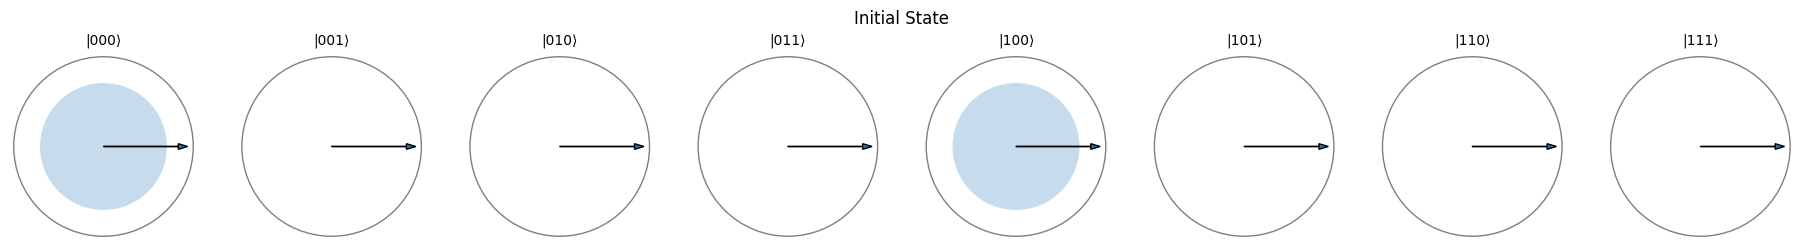

In [157]:
# Save copy of the circuit and get statevector
qc_init = qc_id.copy()
qc_init.save_statevector()
qc_id_state = statevector_from_aer(qc_init)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Initial State').viz_circle()


3. Perform an increment operation (by 1) +=

In [158]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_id.x(0)

4. Plot the quantum states using the circle notation. 

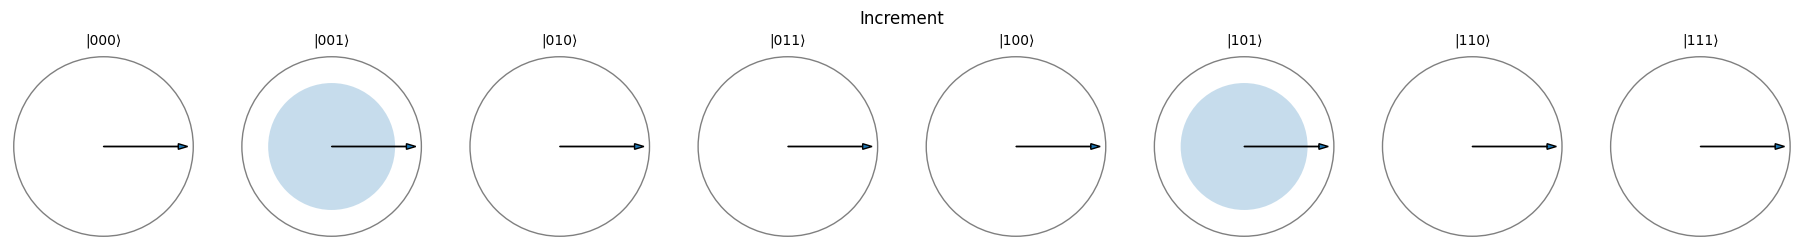

In [159]:
# Save copy of the circuit and get statevector
qc_increment = qc_id.copy()
qc_increment.save_statevector()
qc_id_state = statevector_from_aer(qc_increment)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Increment').viz_circle()

5. Perform a decrement operation (by 1) -=

In [160]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_id.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

6. Plot the quantum states using the circle notation. 

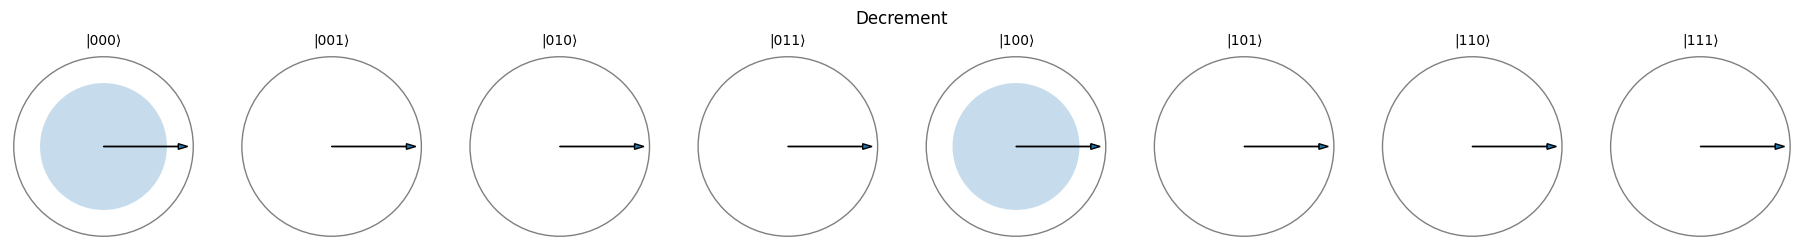

In [161]:
# Save copy of the circuit and get statevector
qc_decrement = qc_id.copy()
qc_decrement.save_statevector()
qc_id_state = statevector_from_aer(qc_decrement)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Decrement').viz_circle()

## **Task 1.2** - Overflow & Underflow / Negative Numbers
---

**1.** What happens if we have an overflow (for the increment) or underflow (for the decrement)? Show the results of the overflow and underflow with an experiment.

### **Increment Overflow**. 
We demonstrate the result of *increment overflow* on the 3-qubit register using the **top state** $\ket {7} = \ket {111}$, and applying 1 increment on the state.

- Step 1: Initialize 3-qubit register with state $\ket {111}$

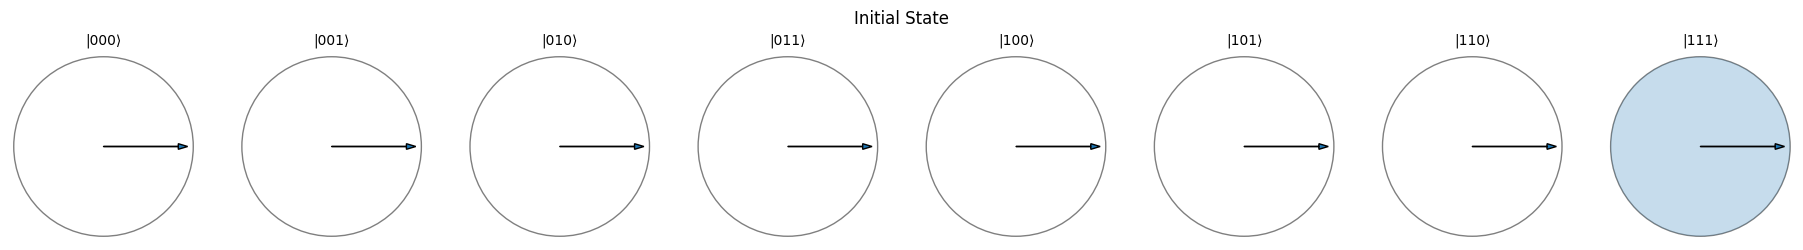

In [162]:
# Initialise 3-qubit register to demonstratre increment overflow
qc_inc_over = QuantumCircuit(3)

# Initialise to |7> state
qc_inc_over.x([0, 1, 2])

# Plot initial statevector in circle notation
qc_inc_over_init = qc_inc_over.copy()
qc_inc_over_init.save_statevector()
qc_inc_over_state = statevector_from_aer(qc_inc_over_init)
QubitSystem(qc_inc_over_state, label='Initial State').viz_circle()

- Step 2: Increment state by $+1$

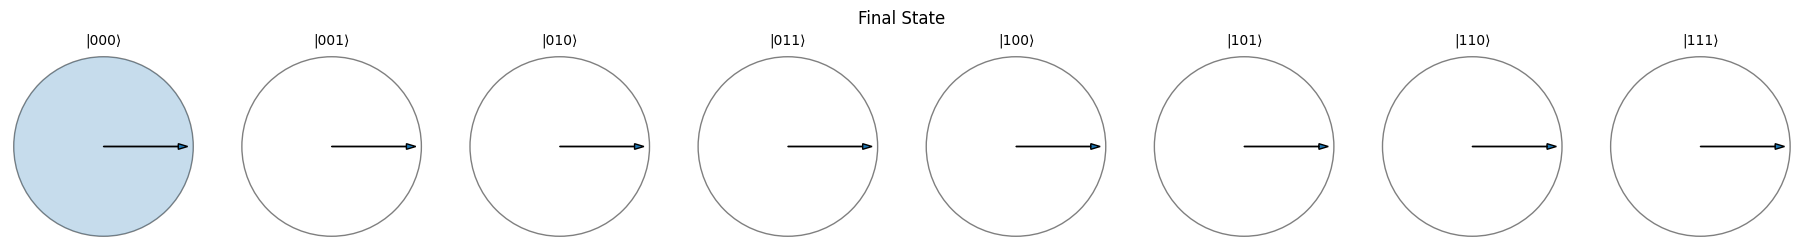

In [163]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_inc_over.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_inc_over.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_inc_over.x(0)

# Plot statevector in circle notation
qc_inc_over_final = qc_inc_over.copy()
qc_inc_over_final.save_statevector()
qc_inc_over_state = statevector_from_aer(qc_inc_over_final)
QubitSystem(qc_inc_over_state, label='Final State').viz_circle()

**Increment Circuit Diagram**

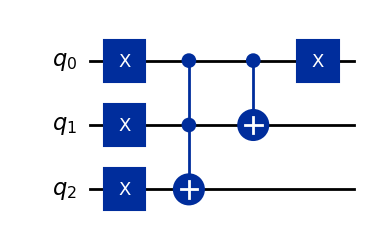

In [167]:
# Plot circuit
qc_inc_over.draw(output='mpl')

**Remarks.** Applying the increment circuit on the top state $\ket {111}$ cycles the system back to the bottom state $\ket {000}$. The increment circuit on the 3-qubit register effectively acts as **addition modulo 8**, which cycles through the computational basis states in the forward sense ($+1$ per increment).

### **Decrement Underflow**. 
From the above result, we can conclude that decrement underflow results in **cycling backwards** through the computational basis states. This is because the decrement circuit is simply the **inverse operation** of the increment circuit. We demonstrate this result by applying the decrement circuit to the bottom state $\ket {000}$.

- Step 1: Initialize 3-qubit register with state $\ket {000}$

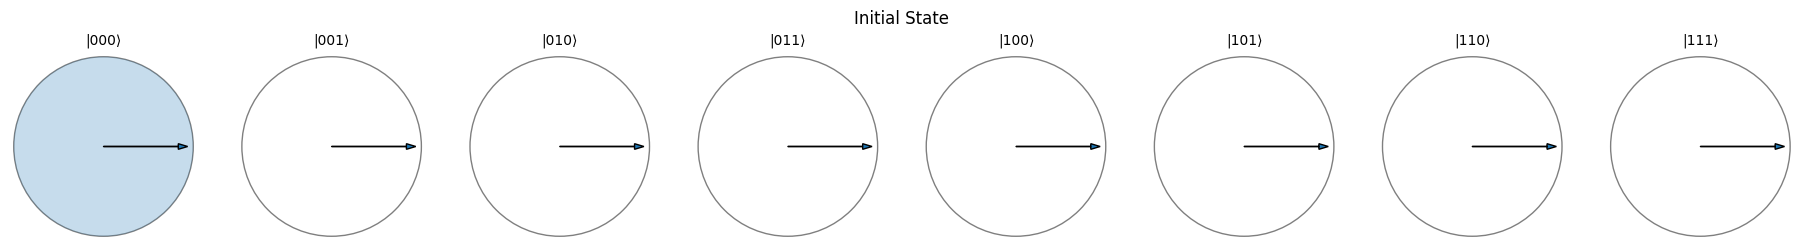

In [165]:
# Initialise 3-qubit register to demonstrate increment overflow
qc_dec_under = QuantumCircuit(3)

# Plot initial statevector in circle notation
qc_dec_under_init = qc_dec_under.copy()
qc_dec_under_init.save_statevector()
qc_dec_under_state = statevector_from_aer(qc_dec_under_init)
QubitSystem(qc_inc_over_state, label='Initial State').viz_circle()

- Step 2: Decrement state by $-1$

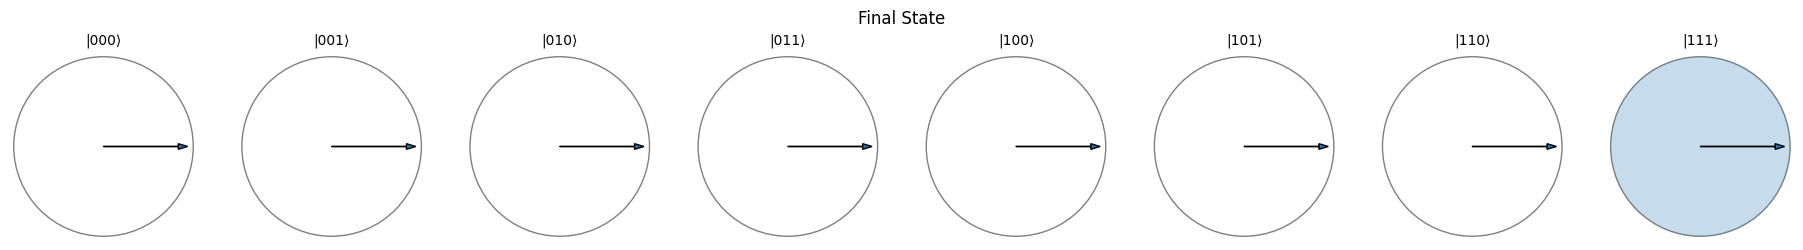

In [166]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_dec_under.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_dec_under.cx(0, 1)

# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_dec_under.ccx(0, 1, 2)

# Plot final statevector in circle notation
qc_dec_under_final = qc_dec_under.copy()
qc_dec_under_final.save_statevector()
qc_dec_under_state = statevector_from_aer(qc_dec_under_final)
QubitSystem(qc_dec_under_state, label='Final State').viz_circle()

**Decrement Circuit Diagram**

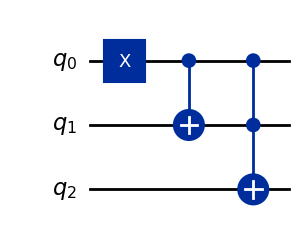

In [168]:
# Plot circuit
qc_dec_under.draw(output='mpl')

**Remarks.** The decrement circuit applied to the initial state $\ket {000}$ results in the final state $\ket {111}$, as predicted. Hence, we conclude that decrement underflow results in **cycling backwards through the computational basis states**. 

**2.** Do increment and decrement operations also work with negative integer numbers? Motivate with an example.

**Remarks.** Yes, the increment and decrement operations also work with negative integers encoded using the **Two's Complement Encoding**. We can see this through the results of task 1.1, by *re-interpreting* the 3-qubit computational basis states as corresponding to the integers $\{-4, \dots, 3\}$ as:

$$  
    \begin{align*}
        \ket {000} &\rightarrow 0 \\
        \ket {001} &\rightarrow 1 \\
        \ket {010} &\rightarrow 2 \\
        \ket {011} &\rightarrow 3 \\
        \ket {100} &\rightarrow -4 \\
        \ket {101} &\rightarrow -3 \\
        \ket {110} &\rightarrow -2 \\
        \ket {111} &\rightarrow -1 \\
    \end{align*}
$$

In this encoding, the increment circuit results in cycling through the integers in the **forward sense** as:

$$
    -4 \rightarrow -3 \rightarrow \dots \rightarrow +3 \rightarrow -4
$$

Consequently, the decrement circuit results in cycling through the integers in the **backward sense** as:

$$
    3 \rightarrow 2 \rightarrow \dots \rightarrow -4 \rightarrow +3
$$

---
